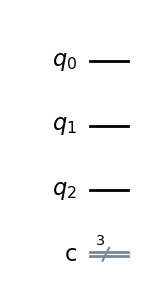

In [30]:
from qiskit import QuantumCircuit
import numpy as np

# Create a 3-qubit circuit
qc = QuantumCircuit(3, 3)

qc.draw(output="mpl")


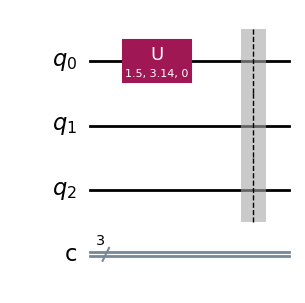

In [31]:
theta = 1.5
varphi = 3.142

# Create the unknown state to be teleported using the u-gate.
qc.u(theta, varphi, 0.0, 0)

qc.barrier()

qc.draw(output="mpl")

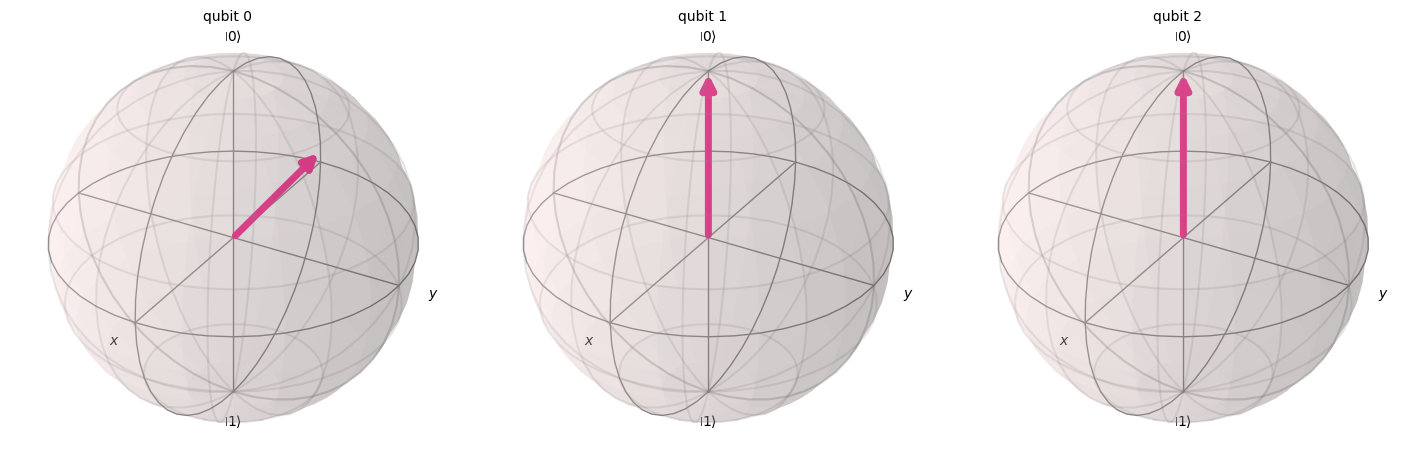

In [32]:

# Show the quantum state on a bloch sphere
from qiskit.quantum_info import Statevector
from qiskit.visualization import plot_bloch_multivector

out_vector = Statevector(qc)

plot_bloch_multivector(out_vector)

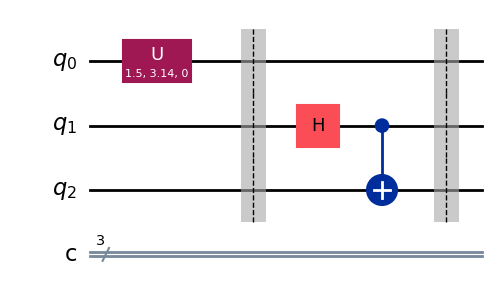

In [33]:
# Initialize the entangled pair to be used for teleportation
qc.h(1)
qc.cx(1, 2)
qc.barrier()

qc.draw(output="mpl")

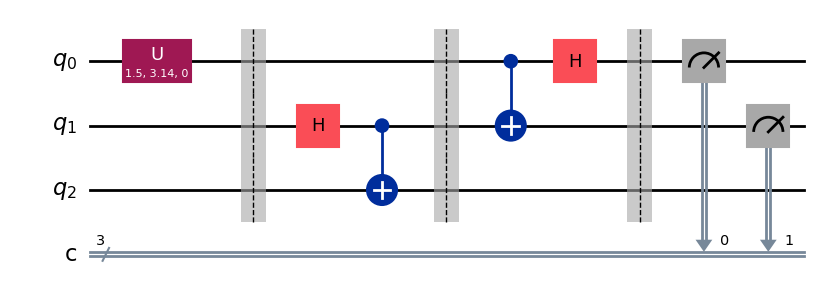

In [34]:
# Implement the teleportation protocol
# Use the CNOT gate and H gate to entangle the unknown state with state of qubit 1
qc.cx(0, 1)
qc.h(0)
qc.barrier()

# Measure the two qubits
qc.measure(0, 0)
qc.measure(1, 1)
qc.draw(output="mpl")



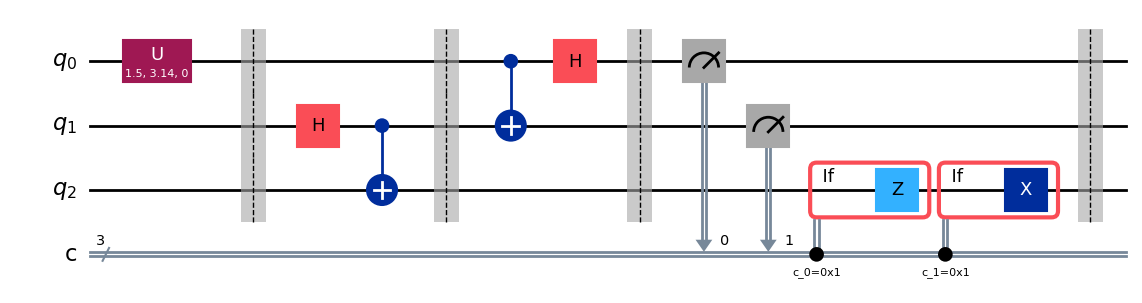

In [35]:
# Apply corrections on Bob's end based on results of Alice's measurement
with qc.if_test((0, 1)):
    qc.z(2)
with qc.if_test((1, 1)):
    qc.x(2)
qc.barrier()

qc.draw(output="mpl")

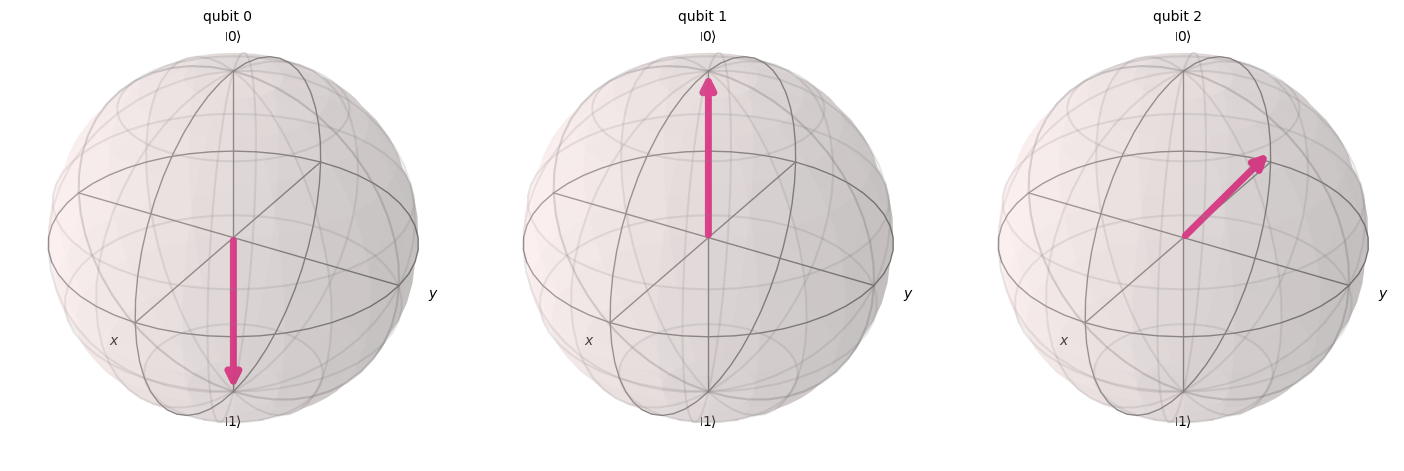

In [36]:
# Visual verification that the correct state has been teleported

from qiskit_aer import StatevectorSimulator

backend = StatevectorSimulator()
out_vector = backend.run(qc, shots=1).result().get_statevector()

plot_bloch_multivector(out_vector)



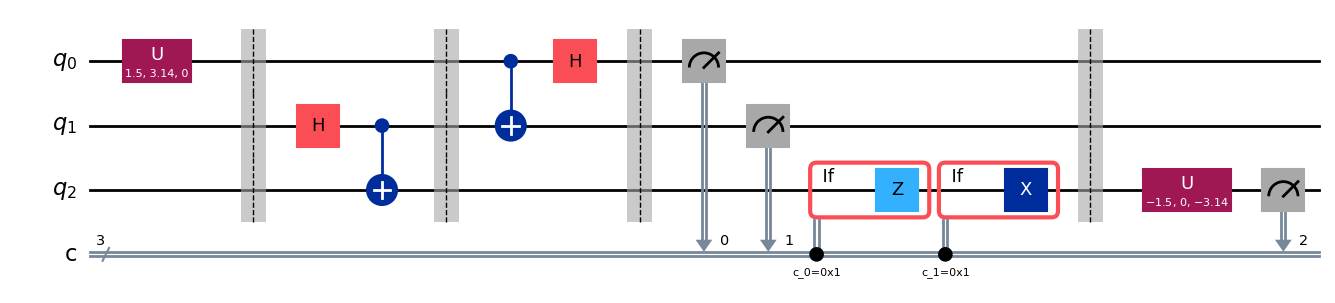

In [37]:
# Verification through the U-inverse gate
# Apply the inverse of u-gate to verify that correct state has been teleported
qc.u(theta, varphi, 0.0, 2).inverse()
qc.measure(2, 2)

qc.draw(output="mpl")


Shots: 4334
{'011': 1040, '000': 1103, '001': 1111, '010': 1080}


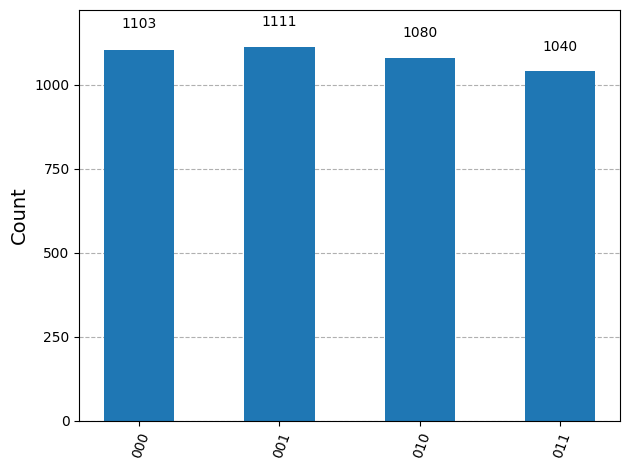

In [ ]:
import numpy as np
from qiskit_aer import AerSimulator
from qiskit.transpiler.preset_passmanagers import generate_preset_pass_manager
from qiskit_ibm_runtime import Sampler
from qiskit.visualization import plot_histogram
from random import randint

nshots = randint(500, 10000)

# Backend selection
backend = AerSimulator()

# Transpilation
pass_manager = generate_preset_pass_manager(backend=backend, optimization_level=1)
isa_qc = pass_manager.run(qc)

# Execution
sampler = Sampler(mode=backend)
job = sampler.run([isa_qc], shots=nshots)
result = job.result()

# Count extraction
counts = result[0].data.c.get_counts()
print(f"Shots: {nshots}")
print(counts)

# Plotting count histogram
plot_histogram(counts)
